In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.preprocessing
import sklearn.datasets

wine = sklearn.datasets.load_wine()

# Access the numerical data from the wine Bunch
data = wine['data']

# Load data about the rows and columns
feature_names = wine['feature_names']

# Load cultivar information about each wine
cultivars = np.array(['Cultivar{}'.format(cl) for cl in wine['target']])

# Create nice names for each row
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])

# use the sklearn StandardScaler to scale to mean 0, variance 1
data = sklearn.preprocessing.StandardScaler().fit_transform(data)

# Gather all of this information into a DataFrame
data = pd.DataFrame(data, columns=feature_names, index=wine_names)

# Print the first 5 rows of the data, eq. to data[:5]
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
Wine1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
Wine2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
Wine3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
Wine4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


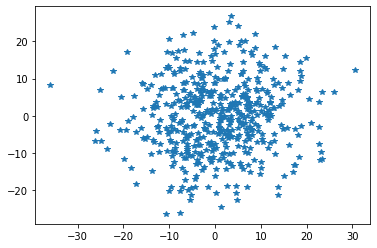

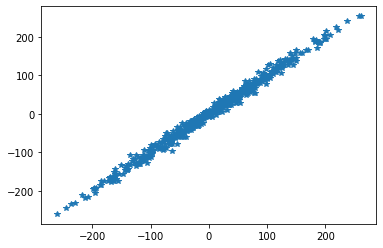

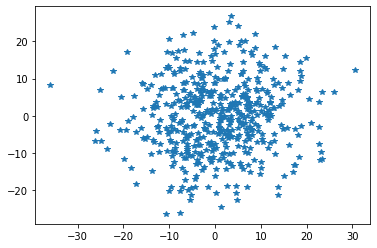

In [35]:
#covMatrixArr = np.array(data.cov())

x_data = np.random.normal(0, 10, 500)
y_data = np.random.normal(0, 1, 500)+x_data
covMatrixArr = np.cov(x_data, y_data)

eigValue, eigVector = np.linalg.eig(covMatrixArr)
numOfSample = x_data.shape[0]
transformMatrix = eigVector.dot(np.diag(np.sqrt(eigValue)))

x = np.random.normal(0, 10, numOfSample)
y = np.random.normal(0, 10, numOfSample)

plt.plot(x,y, '*')
plt.show()
X = np.array([x,y]).T

# get transformed data from the covariance matrix given by x_data, y_data
X_transform = transformMatrix.dot(X.T).T
plt.plot(X_transform[:,0], X_transform[:,1], '*')
plt.show()

# decorrelate the data
X_detransform = np.linalg.inv(transformMatrix).dot(X_transform.T).T
plt.plot(X_detransform[:,0], X_detransform[:,1], '*')
plt.show()